## 빅데이터 실습

### COVID19 코로나 바이러스의 영향으로 중국인 관광객이 얼마나 줄었을까?

#### 데이터 수집
- 한국관광공사, [한국관광 데이터랩](https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do)

#### 데이터 로드 및전처리
- 분석전에 제일 중요한 단계. 데이터 분석의 8할은 데이터 전처리다.
- Data Preprocessing : 분석에 적합하도록 원하는(쉬운) 형태로 데이터 가공과정
    - 결측지(None, Null, Nan) 처리, 이상치 처리, 변수 정규화, 파생변수 생성

#### 엑셀파일 로드

In [11]:
# 판다스 사용 등록
import pandas as pd

In [12]:
kto_201901 = pd.read_excel('./data/kto_201901.xlsx',header=1, usecols='A:G',skipfooter=4)
kto_201901

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570
...,...,...,...,...,...,...,...
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526


In [13]:
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [14]:
kto_201901.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526
66,교포,0,0,0,0,15526,15526


In [15]:
# DF 각 정보개요
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [16]:
# DF의 각 통계치
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [17]:
# 한번도 한국에 방문한적이 없는 대륙, 나라(목적별)
# 문자열 여려줄, 논리연산 여러줄 작성 시는 \ 를 붙여줘야한다
condition = (kto_201901['관광'] == 0) | (kto_201901['상용'] == 0 )\
              | (kto_201901['공용'] == 0) | (kto_201901['유학/연수']==0)

In [384]:
## cmap 
'''
'Accent', 'Accent_r', 'Blues', 'Blues_r', 
'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 
'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 
'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 
'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 
'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 
'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 
'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 
'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 
'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar',
'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 
'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r',
'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 
'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 
'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 
'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 
'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 
'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
'terrain', 'terrain_r', 'turbo', 'turbo_r', 
'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'
'''

kto_201901[condition]
kto_201901.style.background_gradient(axis=None, vmin=0, vmax=200_000, cmap='YlGnBu')

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570
5,태국,34004,37,199,96,6998,41334
6,말레이시아,19043,95,7,99,2821,22065
7,필리핀,14279,211,161,184,15638,30473
8,인도네시아,14183,136,38,187,4298,18842
9,싱가포르,8372,94,8,48,1333,9855


In [18]:
## 2. 기준년월 컬럼 추가
kto_201901['기준년월'] = '2019-01'
kto_201901

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
...,...,...,...,...,...,...,...,...
62,아프리카 기타,768,718,90,206,908,2690,2019-01
63,기타대륙,33,4,0,1,16,54,2019-01
64,국적미상,33,4,0,1,16,54,2019-01
65,교포소계,0,0,0,0,15526,15526,2019-01


In [19]:
## 국적데이터만 추출
kto_201901['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [20]:
## 8개 밖에 안되는 데이터를 뽑아낼려고 코딩하는 것은 멍청한 짓!!!
for item in kto_201901['국적']:
    if item.strip()[-1] == '주':
        print(item)

아시아주
미주
구주
대양주
아프리카주


In [21]:
## 대륙 리스트 총 7개
continent_list = ['아시아주','미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
continent_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [22]:
## 대륙을 뺀 국적리스트 일단 보류
condition = kto_201901['국적']

In [23]:
## 4. 대륙외  국적들만 뽑아내기
condition = (kto_201901['국적'].isin(continent_list) == False)
kto201901_countries = kto_201901[condition]
kto201901_countries['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [24]:
# 중간에 비는 익덱스없이 다시 지정, inplace =True 기존 데이터를 대체
kto201901_countries.reset_index(drop=True, inplace=True)

In [25]:
kto201901_countries

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01
5,말레이시아,19043,95,7,99,2821,22065,2019-01
6,필리핀,14279,211,161,184,15638,30473,2019-01
7,인도네시아,14183,136,38,187,4298,18842,2019-01
8,싱가포르,8372,94,8,48,1333,9855,2019-01
9,미얀마,1304,10,31,67,3877,5289,2019-01


In [26]:
## 대륙컬럼을 추가 사전작업
for i in continent_list:
    print(i)

아시아주
미주
구주
대양주
아프리카주
기타대륙
교포소계


In [27]:
# 대륙 리스트 재구성
continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']

In [28]:
## SettingWithCopyWarning: .해제하는 법
pd.set_option('mode.chained_assignment',None)

In [29]:
# 5. 국적간 데이터 DF 마지막에 대륙컬럼 추가
kto201901_countries['대륙'] = continents
kto201901_countries


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아
8,싱가포르,8372,94,8,48,1333,9855,2019-01,아시아
9,미얀마,1304,10,31,67,3877,5289,2019-01,아시아


In [30]:
## 6. 국적별 관광객 비율 컬럼추가 
kto201901_countries['관광객 비율(%)'] = round(kto201901_countries['관광'] / kto201901_countries['계'] * 100, 1)

In [31]:
kto201901_countries

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아,46.9
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아,75.3
8,싱가포르,8372,94,8,48,1333,9855,2019-01,아시아,85.0
9,미얀마,1304,10,31,67,3877,5289,2019-01,아시아,24.7


In [32]:
## 관광개 비율이 높은 나라 Top5
kto201901_countries.sort_values(by = '관광객 비율(%)', ascending = False).head(6)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4
19,이스라엘,727,12,0,9,57,805,2019-01,아시아,90.3


In [33]:
## 관광객 비율 평균 pivot_table
kto201901_countries.pivot_table(values='관광객 비율(%)', index='대륙', aggfunc = 'mean')

,관광객 비율(%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


In [34]:
## 중국만 필터링
condition = kto201901_countries['국적'] == '중국'
kto201901_countries[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5


In [35]:
## 전체 외국인 관광객 수
totalSum = sum(kto201901_countries['관광'])

In [36]:
## 7. 전체비율(%) 컬럼 추가
kto201901_countries['전체비율(%)'] = round(kto201901_countries['관광'] / totalSum * 100, 1)

In [37]:
# 관광객수가 가장 많은 국적 top10
kto201901_countries.sort_values(by="전체비율(%)",ascending=False).head(10)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3,2.2
47,러시아,17260,181,37,191,7525,25194,2019-01,유럽,68.5,2.0
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아,46.9,1.6
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아,75.3,1.6


In [38]:
## 125개 데이터를 전부 확인 불가
## 샘플링 조회
kto_201901 = pd.read_excel('./data/kto_201909.xlsx',header=1, usecols='A:G',skipfooter=4)
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


##### 종합
- 위에서 하나의 엑셀로 처리한 방식을 반복문을 통해서 하나의 전체 125개 데이터를 통합하는 작업
- 1~7까지의 작업을 하나의 함수로 생성

In [39]:
def createKtoData(yyyy, mm):
    # 1. 엑셀파일 지정
    filePath = f'./data/kto_{yyyy}{mm:02d}.xlsx' # mm 이 1~9까지 들어오면 01~09로 변경해줘야함
    #1. 엑셀파일 불러오기
    df = pd.read_excel(filePath, header=1, usecols='A:G', skipfooter=4)
    #2. 기준연월 컬럼 추가
    df['기준년월'] = f'{yyyy}-{mm:02d}' # mm 이 1~9까지 들어오면 01~09로 변경해줘야함
    #3. 국적컬럼에서 대륙제거 국가만 추출
    ignore_list = ['아시아주','미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
    #대륙제거
    condition = (df['국적'].isin(ignore_list) == False)
    df_countries = df[condition].reset_index(drop = True)
    # 5. 대륙컬럼추가
    continents = ['아시아']*25 + ['아매리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']
    df_countries['대륙'] = continents
    # 6. 국적별 관광객 비율 컬럼 추가
    df_countries['관광객 비율(%)'] = round(df_countries['관광'] / df_countries['계'] * 100, 1)
    #7. 전체비율 컬럼추가
    totalSum= sum(df_countries['관광'])
    df_countries['전체비율(%)'] = round(df_countries['관광'] / totalSum * 100,1)
    # 8. 결과 리턴
    return (df_countries)


In [40]:
## 테스트
df_test = createKtoData(2019,5)
df_test

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체비율(%)
0,일본,279174,2019,91,715,4274,286273,2019-05,아시아,97.5,22.6
1,대만,100004,84,11,234,1446,101779,2019-05,아시아,98.3,8.1
2,홍콩,55756,56,2,147,1065,57026,2019-05,아시아,97.8,4.5
3,마카오,2885,1,0,13,10,2909,2019-05,아시아,99.2,0.2
4,태국,45671,61,445,71,6412,52660,2019-05,아시아,86.7,3.7
5,말레이시아,28485,116,1,57,2558,31217,2019-05,아시아,91.2,2.3
6,필리핀,29015,201,176,56,21121,50569,2019-05,아시아,57.4,2.4
7,인도네시아,11464,154,152,75,7091,18936,2019-05,아시아,60.5,0.9
8,싱가포르,18448,152,2,71,1441,20114,2019-05,아시아,91.7,1.5
9,미얀마,1990,17,83,33,4433,6556,2019-05,아시아,30.4,0.2


In [41]:
## 반복문으로 기준년월 출력
for yyyy in range(2010,2021):
    for mm in range(1,13):
        print(yyyy,mm)

2010 1
2010 2
2010 3
2010 4
2010 5
2010 6
2010 7
2010 8
2010 9
2010 10
2010 11
2010 12
2011 1
2011 2
2011 3
2011 4
2011 5
2011 6
2011 7
2011 8
2011 9
2011 10
2011 11
2011 12
2012 1
2012 2
2012 3
2012 4
2012 5
2012 6
2012 7
2012 8
2012 9
2012 10
2012 11
2012 12
2013 1
2013 2
2013 3
2013 4
2013 5
2013 6
2013 7
2013 8
2013 9
2013 10
2013 11
2013 12
2014 1
2014 2
2014 3
2014 4
2014 5
2014 6
2014 7
2014 8
2014 9
2014 10
2014 11
2014 12
2015 1
2015 2
2015 3
2015 4
2015 5
2015 6
2015 7
2015 8
2015 9
2015 10
2015 11
2015 12
2016 1
2016 2
2016 3
2016 4
2016 5
2016 6
2016 7
2016 8
2016 9
2016 10
2016 11
2016 12
2017 1
2017 2
2017 3
2017 4
2017 5
2017 6
2017 7
2017 8
2017 9
2017 10
2017 11
2017 12
2018 1
2018 2
2018 3
2018 4
2018 5
2018 6
2018 7
2018 8
2018 9
2018 10
2018 11
2018 12
2019 1
2019 2
2019 3
2019 4
2019 5
2019 6
2019 7
2019 8
2019 9
2019 10
2019 11
2019 12
2020 1
2020 2
2020 3
2020 4
2020 5
2020 6
2020 7
2020 8
2020 9
2020 10
2020 11
2020 12


##### tqdm 라이브러리
프로그래스바

In [42]:
from tqdm import tqdm
import time

In [43]:
text=''
strList = ['H','e','l','l','o','','P','y','t','h','o','n']
for char in tqdm(strList):
    text = text + char
    time.sleep(0.5)

  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:06<00:00,  2.00it/s]


In [44]:
## 빈 DF
df_total = pd.DataFrame()

In [45]:
for yyyy in tqdm(range(2010, 2021)):
    for mm in range(1, 13):
        try:
            temp = createKtoData(yyyy,mm)
            df_total = pd.concat([df_total, temp], ignore_index = True)
        except:
            pass


100%|██████████| 11/11 [00:03<00:00,  3.32it/s]


In [46]:
## 결과보기
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   국적         7500 non-null   object 
 1   관광         7500 non-null   int64  
 2   상용         7500 non-null   int64  
 3   공용         7500 non-null   int64  
 4   유학/연수      7500 non-null   int64  
 5   기타         7500 non-null   int64  
 6   계          7500 non-null   int64  
 7   기준년월       7500 non-null   object 
 8   대륙         7500 non-null   object 
 9   관광객 비율(%)  7500 non-null   float64
 10  전체비율(%)    7500 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 644.7+ KB


In [47]:
## 파일 저장
df_total.to_excel('./data/kto_total.xlsx', index = False)

In [48]:
## 중국국적 데이터만 추출
condition = df_total['국적'] == '중국'

In [49]:
df_china = df_total[condition]

#### 데이터 시각화 / 분석
분석 먼저하고 시각화 할 수도 있고, 시각화한 지표로 분석할 수도 있음

In [50]:
df_china.reset_index(inplace=True)

In [51]:
df_china

,index,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체비율(%)
0,17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
1,77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
2,137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
3,197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
4,257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
120,7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,38.2
121,7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,9.8
122,7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,16.0
123,7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,10.2


##### Matplotlib 시각화
- 필요라이브러리 가져오기
- 한글깨짐현상 해결

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# 한글 깨짐 문제 해결
from matplotlib import rcParams, font_manager,rc

font_path = 'C:/windows/Fonts/NanumGothicCoding.ttf'#나눔고딕체 사용
font = font_manager.FontProperties(fname=font_path).get_name() #실제 설치된 폰트 이름조회
rc('font', family=font) #한글깨짐현상 해결!!
rcParams['axes.unicode_minus']=False #한글 사용시 마이너스 표시 깨짐 해결!

In [54]:
# 차트 스타일 지정
sns.set_style('darkgrid')

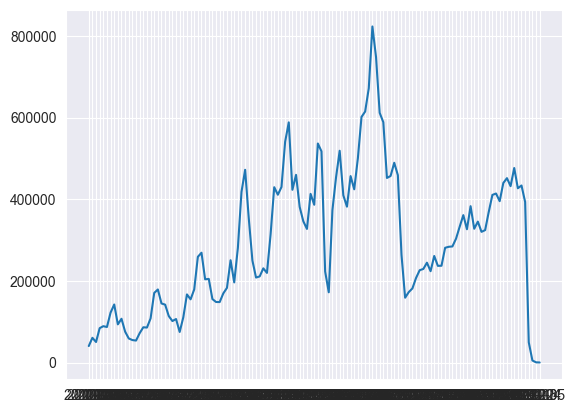

In [55]:
plt.plot(df_china['기준년월'], df_china['관광'])
plt.show()

In [56]:
# list comprehension
[f'{i}-01' for i in range(2010, 2021)]

['2010-01',
 '2011-01',
 '2012-01',
 '2013-01',
 '2014-01',
 '2015-01',
 '2016-01',
 '2017-01',
 '2018-01',
 '2019-01',
 '2020-01']

In [57]:
## 불필요한 경고 메시지 제거
import warnings
warnings.filterwarnings('ignore')

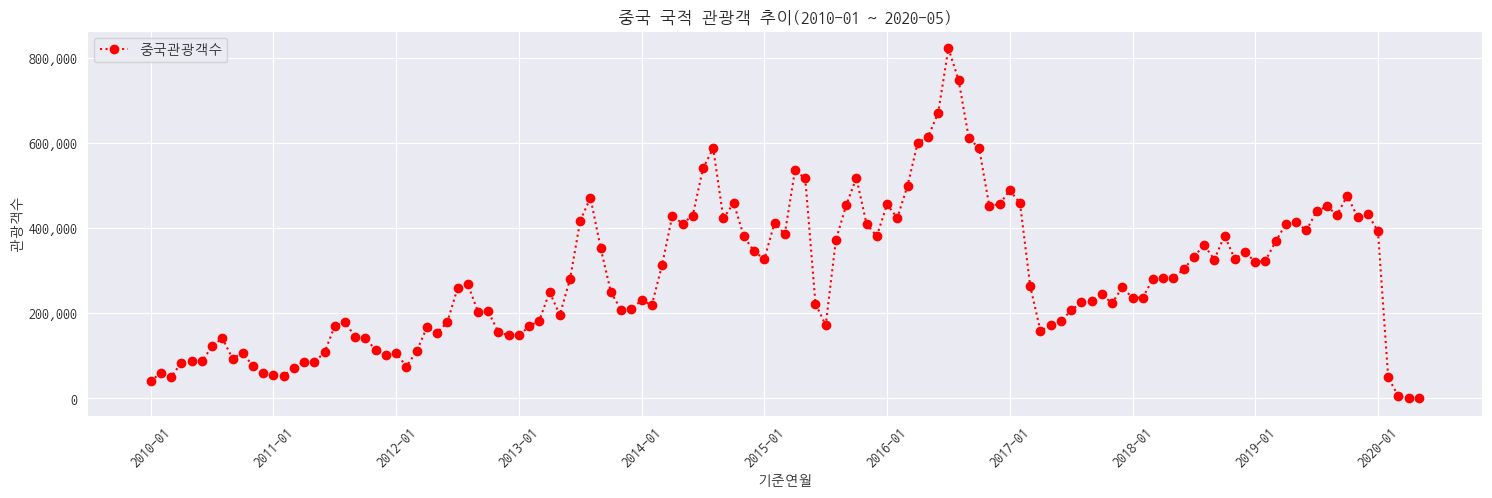

In [66]:
## 이쁘게 위의 데이터 출력차트 변경
## 차트 크기 조절
plt.figure(figsize=(18, 5)) # w: 18, h: 5
## 차트 그릴 내용, 범례에 표시할 label, 라인색, 라인스타일, 마커표시
plt.plot(df_china['기준년월'], df_china['관광'], label='중국관광객수', color = 'r', linestyle=':',marker='o')
## 타이틀 , 라벨, 범례
plt.title('중국 국적 관광객 추이(2010-01 ~ 2020-05)')
plt.xlabel('기준연월')
plt.ylabel('관광객수')
plt.legend(loc='upper left')
## x축 라벨 
plt.xticks([f'{i}-01' for i in range(2010, 2021)], rotation=45)
## y 축 라벨(1000 단위 쉼표)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{x:,.0f}'for x in current_values])
plt.show()

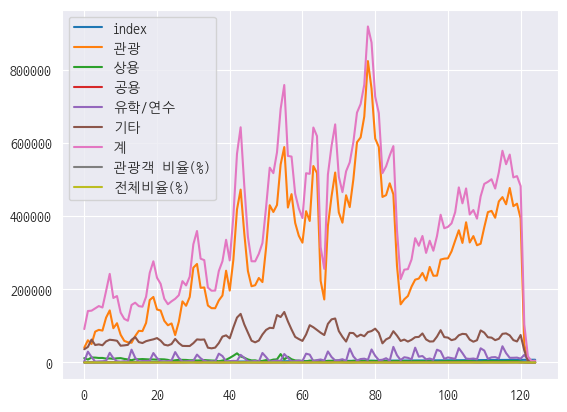

In [64]:
df_china.plot()
plt.show()